# Intro
Most of the time, when working with data from a data warehouse (DWH), the datasets are already cleansed and stored in tables or views. In those cases, I simply need to write well-structured SQL queries to extract the data for further use.

However, it often happens that I encounter issues such as duplicates, missing values, text in numeric columns, or numbers stored as text. In those situations, I need to perform data cleansing and exploratory analysis to better understand the dataset.

At work, I usually handle this cleansing directly in SQL—mainly due to company regulations that restrict me from using Python. While I personally find this limiting, both SQL and Python have their strengths, and almost everything achievable in one can also be done in the other when it comes to data cleaning.

Here, I will demonstrate both approaches.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Setting to make numbers easier to read
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns when displaying a dataframe
# Adding a numbe instead of None limits the number of columns shown
pd.set_option('display.max_columns', None) 

df = pd.read_csv("data_to_be_cleaned.csv")
df.head()

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum


For this exercise, I’ll be working with a fictional dataset called data_to_be_cleaned. I came across it in a tutorial (https://www.youtube.com/watch?v=ycQbwBqB8wY&t=314s), and it’s a great example for practicing real-world data cleaning tasks. Even though the data is not “real,” the issues are very similar to what we often encounter in business environments.

**Problems in the dataset**
- Strange characters: Angle brackets and other symbols appear in the client column.
- Inconsistent capitalization: Names in the client and beneficiary columns are sometimes written in uppercase, sometimes in lowercase.
- Missing values: Some fields contain NaN.
- Potential duplicates: Certain transactions look suspiciously similar (e.g., transactions 3 and 4).  


In [ ]:
df.info()
# It has actually only 40 rows O_O =)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        40 non-null     int64  
 1   Client               38 non-null     object 
 2   Beneficiary          40 non-null     object 
 3   AmountUSD            38 non-null     float64
 4   TransactionDateTime  40 non-null     object 
 5   ClientTier           37 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


There are several ways to deal with errors in data: you can drop them, correct them (if possible), impute or infer missing values. In some cases, flagging or even ignoring errors is also an option. The key is to always balance data integrity with business requirements. For financial transaction data, flagging and documenting errors is usually the safer choice.

# Data Cleansing

## Alphabetic Characters

**Dropping data**  

Since this is fictional data, I will simply drop the rows with missing values in the client column.

Irl, I would take a closer look before removing them. For example, I might try to make an informed guess about the missing client by using related information such as the beneficiary, amount, or date.

It’s also possible that the transaction wasn’t completed at the time I extracted the data. In such cases, I would check with the business side to confirm before deciding how to handle it.

In [12]:
Cleaned_df = df.copy()
#  I created a copy of the original dataframe to keep it intact from any changes.
Cleaned_df.dropna(subset=["Client"], inplace=True)
# Use inplace=True when you are 100% sure you don’t need the original data anymore. 
Cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold



**Deleting Duplicates**
Be very careful when deleting transaction data in real life. Many rows may look like duplicates, but they can still represent valid transactions.

To decide whether something is truly a duplicate, it’s best to consult the data owner or people who understand the booking system in detail. I usually try to extend the transaction context (e.g., by looking at related attributes such as date, product name, contract number, ezc.) before making a decision.

For example, I would delete duplicate rows in dimensional tables only if they clearly represent the same entity — such as one person being recorded twice in the dataset because of two different email addresses. In that case, I would keep the row with the actual or most reliable email address.

In [ ]:
Cleaned_df.drop_duplicates(subset=["Client","Beneficiary","AmountUSD","TransactionDateTime","ClientTier"],inplace=True)

Cleaned_df


,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


**Dealing with formating issues**
Using regex to define what we want to keep or delete

In [17]:
# Keep only alphabet characters and spaces in Client and Beneficiary columns
Cleaned_df["Client"] = Cleaned_df["Client"].str.replace(r"[^A-Za-z\s]", "", regex=True)
Cleaned_df["Beneficiary"] =Cleaned_df["Beneficiary"].str.replace(r"[^A-Za-z\s]", "", regex=True)

Cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,Frodo Baggins,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,HarryPotter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


In this case, I already know exactly what I expect in the column (alphabetic characters and spaces), so I can define this explicitly in my cleaning rule. Of course, there are other approaches to remove non-alphabet characters, depending on the context and requirements.

In [ ]:
# Find what other characters are in the Client column
# cleaned_df["Client"].str.replace("[a-zA-Z0-9 ]", "", regex=True).unique()
# use strip and replace to remoce those.
# cleaned_df["Client"] = cleaned_df["Client"].str.strip("<>.*- ")
# cleaned_df["Client"] = cleaned_df["Client"].str.replace("*", " ")

**Dealing with capitalized and non-capitalized names**  
Just UPPERCASE them all!

In [18]:
Cleaned_df["Client"] = Cleaned_df["Client"].str.upper()
Cleaned_df["Beneficiary"] = Cleaned_df["Beneficiary"].str.upper()

Cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,NaN,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRYPOTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


## Nummeric data

We can handle missing values in several ways:

- Use statistical methods such as mean or median to fill them in.
- Apply a machine learning algorithm to predict the missing values.
- Simply delete the rows/columns, or tag them for further review.

The most important point is this: understand the relevance of the data and choose the method accordingly.

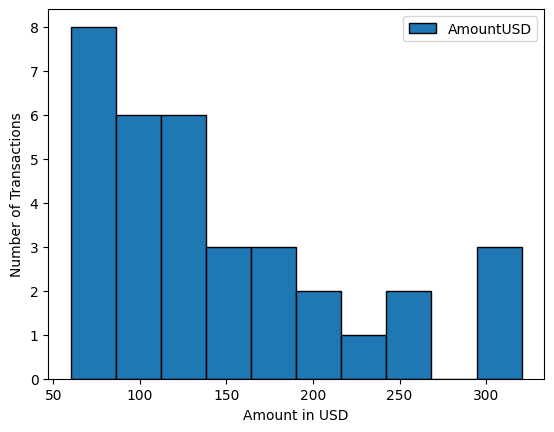

In [20]:
# In this case, we will check the distribution and decide our method.
ax = Cleaned_df["AmountUSD"].plot(kind="hist", bins=10, edgecolor="black")
ax.set_xlabel("Amount in USD")
ax.set_ylabel("Number of Transactions")

ax.legend()
plt.show()

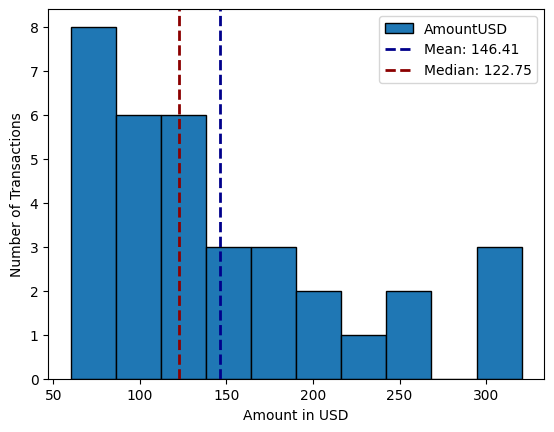

In [ ]:
# Adding mean and median lines to the histogram
mean_value = Cleaned_df["AmountUSD"].mean()
median_value = Cleaned_df["AmountUSD"].median()

ax = Cleaned_df['AmountUSD'].plot(kind="hist", bins=10, edgecolor="black")
ax.set_xlabel("Amount in USD")
ax.set_ylabel("Number of Transactions")

ax.axvline(mean_value, color="darkblue", linestyle="dashed", linewidth=2, label=f"Mean: {mean_value:.2f}")
ax.axvline(median_value, color="darkred", linestyle="dashed", linewidth=2, label=f"Median: {median_value:.2f}")

ax.legend()

plt.show()

When replacing missing values with statistical measures (such as the mean or median), our goal is to keep the error as low as possible.

But how do we know whether the error is high or low?
We can estimate it by calculating the distance between the actual data points and the chosen statistic (mean or median). The smaller this difference, the better the replacement will represent the original data.

In [22]:
np.abs(Cleaned_df["AmountUSD"] - mean_value).mean()

np.float64(59.06384083044982)

In [23]:
np.abs(Cleaned_df["AmountUSD"] - median_value).mean()

np.float64(55.79117647058824)

In [24]:
# So, it is clear that replacing missing values with the median will result in a lower error.
Cleaned_df.fillna({"AmountUSD": median_value}, inplace=True)
# The line above is recommended by pandas documentation. It also works with multiple columns. Like: Cleaned_df.fillna({"AmountUSD": median_value, "Client": "MimiMon"}, inplace=True)
# I have always used this: Cleaned_df["AmountUSD"].fillna(median_value, inplace=True) TT__TT
Cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRYPOTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


## Categorical Data

In this case, I would not replace missing values in categorical data using statistical methods (like mode imputation). Instead, I prefer to dig into the data and try to find the correct value, or group the records into an “Other/Unknown” category.

The reason is simple: I don’t want to introduce unnecessary error into the dataset. My usual approach is to check the monetary value of the rows with missing categories:

- If the sum is not significant, I will drop those rows.

- If the sum is significant (almost like an outlier), I will investigate further and try to determine the correct category.

In [ ]:
# Technically, what is also possible:
# client_tier_mode = cleaned_df["ClientTier"].mode()[0]
# cleaned_df.fillna({"ClientTier": client_tier_mode}, inplace=True)
